### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Helper functions

In [2]:
def countries_to_consider(column_counts, threshold = 1000):
    result = []
    column_list = zip(column_counts.index, column_counts.values)
    for country, count in column_list:
        if count >= threshold:
            result.append(country)
    return result

def convert_YearsCodePro(experience):
    if experience == 'More than 50 years':
        return 50
    elif experience == 'Less than 1 year':
        return 0.5
    else:
        return float(experience)


def convert_OrgSize(size):
    if size in ['2 to 9 employees', '10 to 19 employees']:
        return 'Less than 20 employees'
    if size == 'Just me - I am a freelancer, sole proprietor, etc.':
        return 'Frelancer/Sole Proprietor'
    return size

### Preprocessing

In [3]:
df = pd.read_csv("../survey_results_public.csv")

# Considering only countries having atleast 1000 data points.
countries_shortlisted = countries_to_consider(df['Country'].value_counts())

# Finalizing data points only from these shortlisted countries.
df = df[df['Country'].isin(countries_shortlisted)]

# Selecting the below columns based on intuition
required_cols = ['MainBranch', 'Age','Employment','RemoteWork','EdLevel',
                 'YearsCodePro', 'DevType','Country','CompTotal','ConvertedCompYearly',
                 'WorkExp','Industry','Currency','OrgSize','ICorPM']

df_subset = df[required_cols]

# Dropping all the NaN entries
df_final = df_subset.dropna()

# Formatting the values into a concise field and appropriate data type
df_final['OrgSize'] = df_final['OrgSize'].apply(convert_OrgSize)
df_final['YearsCodePro'] = df_final['YearsCodePro'].apply(convert_YearsCodePro)

In [4]:
renaming_education_level = {'Bachelor’s degree (B.A., B.S., B.Eng., etc.)' : 'Bachelors',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)' : 'Masters',
       'Some college/university study without earning a degree' : 'Some College',
       'Professional degree (JD, MD, Ph.D, Ed.D, etc.)' : 'PhD, Postdoc',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)' : 'Secondary School',
       'Associate degree (A.A., A.S., etc.)' : 'Associate degree',
       'Primary/elementary school' : 'Primary School',
       'Something else' : 'Something else'}

df_final.loc[:,'EdLevel'] = df_final['EdLevel'].map(renaming_education_level)

In [5]:
df_final.head()

,MainBranch,Age,Employment,RemoteWork,EdLevel,YearsCodePro,DevType,Country,CompTotal,ConvertedCompYearly,WorkExp,Industry,Currency,OrgSize,ICorPM
1,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Bachelors,9.0,"Senior Executive (C-Suite, VP, etc.)",United States of America,285000.0,285000.0,10.0,"Information Services, IT, Software Development...",USD\tUnited States dollar,Less than 20 employees,People manager
2,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Bachelors,23.0,"Developer, back-end",United States of America,250000.0,250000.0,23.0,"Information Services, IT, Software Development...",USD\tUnited States dollar,"5,000 to 9,999 employees",Individual contributor
5,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Some College,21.0,"Developer, back-end",United Kingdom of Great Britain and Northern I...,78000.0,96828.0,22.0,Other,GBP\tPound sterling,100 to 499 employees,Individual contributor
6,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Some College,3.0,"Developer, full-stack",United States of America,135000.0,135000.0,4.0,"Information Services, IT, Software Development...",USD\tUnited States dollar,"1,000 to 4,999 employees",Individual contributor
12,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Bachelors,9.0,"Developer, full-stack",United States of America,75000.0,75000.0,9.0,Other,USD\tUnited States dollar,Less than 20 employees,Individual contributor


### Just Considering United States Data

In [6]:
df_usa = df_final[df_final['Country'] == 'United States of America']

### Sanity check for any discrepancies between CompTotal & ConvertedCompYearly

In [7]:
mismatched_records = df_usa[df_usa['CompTotal'] != df_usa['ConvertedCompYearly']]

In [8]:
df_usa = df_usa[~df_usa.index.isin(mismatched_records.index)]

### Inspecting how the overall yearly median compensation is varying w.r.t each variable 

#### Age

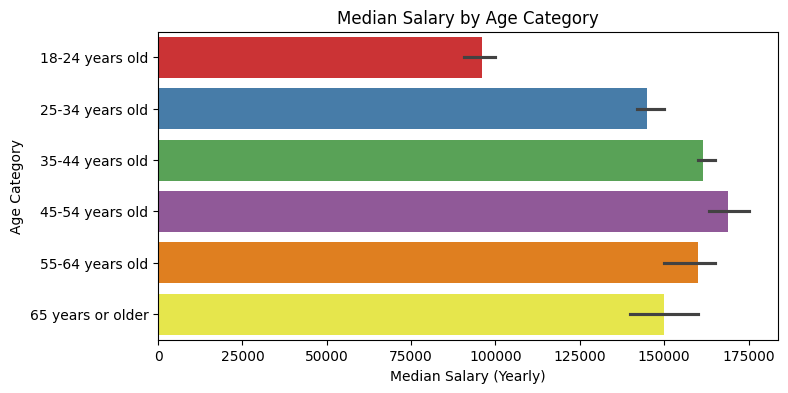

In [9]:
age_order = ['18-24 years old', '25-34 years old', '35-44 years old', '45-54 years old', '55-64 years old', '65 years or older']
plt.figure(figsize=(8, 4))
sns.barplot(y='Age', x='ConvertedCompYearly', data=df_usa, estimator='median', errorbar='ci',order = age_order,palette='Set1')
plt.ylabel('Age Category')
plt.xlabel('Median Salary (Yearly)')
plt.title('Median Salary by Age Category')
plt.show()

#### MainBranch

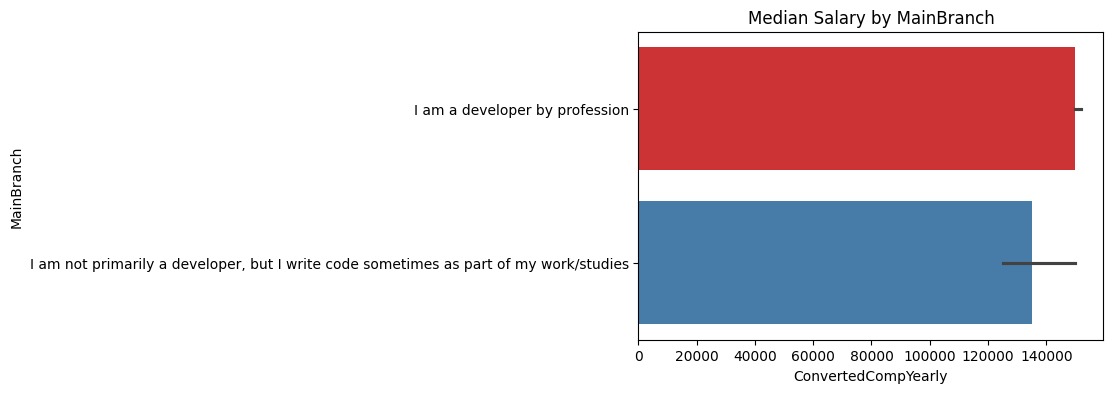

In [10]:
plt.figure(figsize=(6, 4))
sns.barplot(y='MainBranch', x='ConvertedCompYearly',estimator='median', data=df_usa,palette='Set1')
plt.ylabel('MainBranch')
plt.xlabel('ConvertedCompYearly')
plt.title('Median Salary by MainBranch')
plt.show()

#### Employment Type

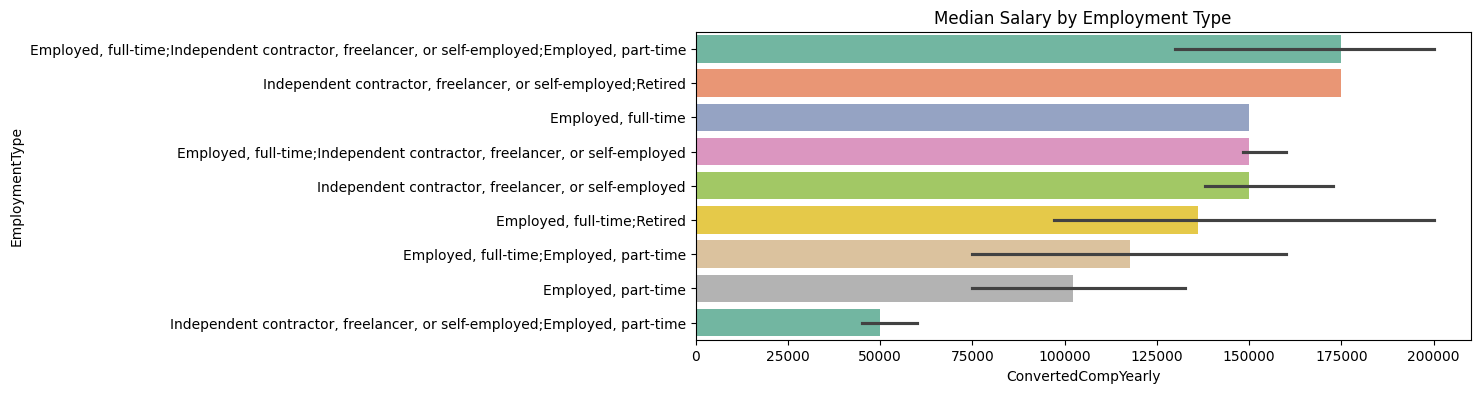

In [11]:
median_salary_by_employment_type = df_usa.groupby('Employment')['ConvertedCompYearly'].median().sort_values(ascending=False).index
plt.figure(figsize=(10, 4))
sns.barplot(y='Employment', x='ConvertedCompYearly',estimator='median', data=df_usa, order = median_salary_by_employment_type,palette='Set2')
plt.ylabel('EmploymentType')
plt.xlabel('ConvertedCompYearly')
plt.title('Median Salary by Employment Type')
plt.show()

#### RemoteWork

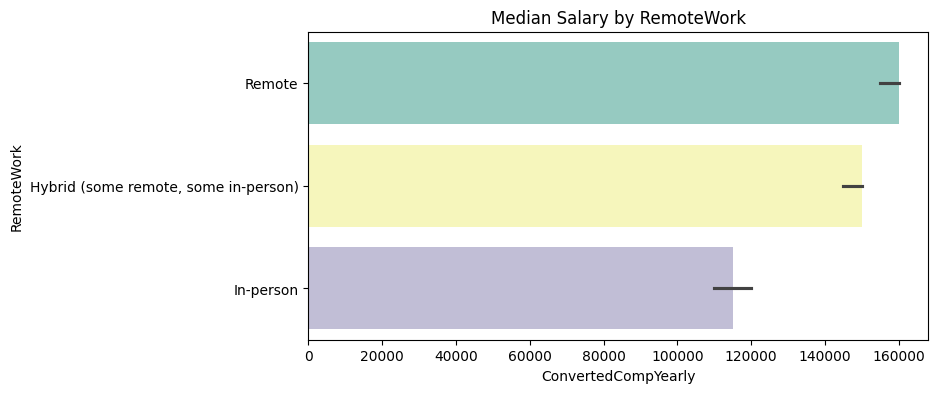

In [12]:
plt.figure(figsize=(8, 4))
sns.barplot(y='RemoteWork', x='ConvertedCompYearly',estimator='median', data=df_usa,palette='Set3')
plt.ylabel('RemoteWork')
plt.xlabel('ConvertedCompYearly')
plt.title('Median Salary by RemoteWork')
plt.show()

#### Education level

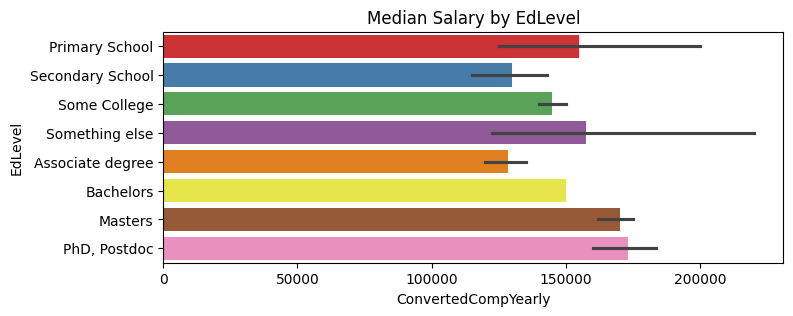

In [13]:
EdLevel_order = ['Primary School', 'Secondary School', 'Some College',  'Something else',
                 'Associate degree', 'Bachelors', 'Masters','PhD, Postdoc']

plt.figure(figsize=(8, 3))
sns.barplot(y='EdLevel', x='ConvertedCompYearly',estimator='median', data=df_usa,order=EdLevel_order,palette='Set1')
plt.ylabel('EdLevel')
plt.xlabel('ConvertedCompYearly')
plt.title('Median Salary by EdLevel')
plt.show()

#### DevType

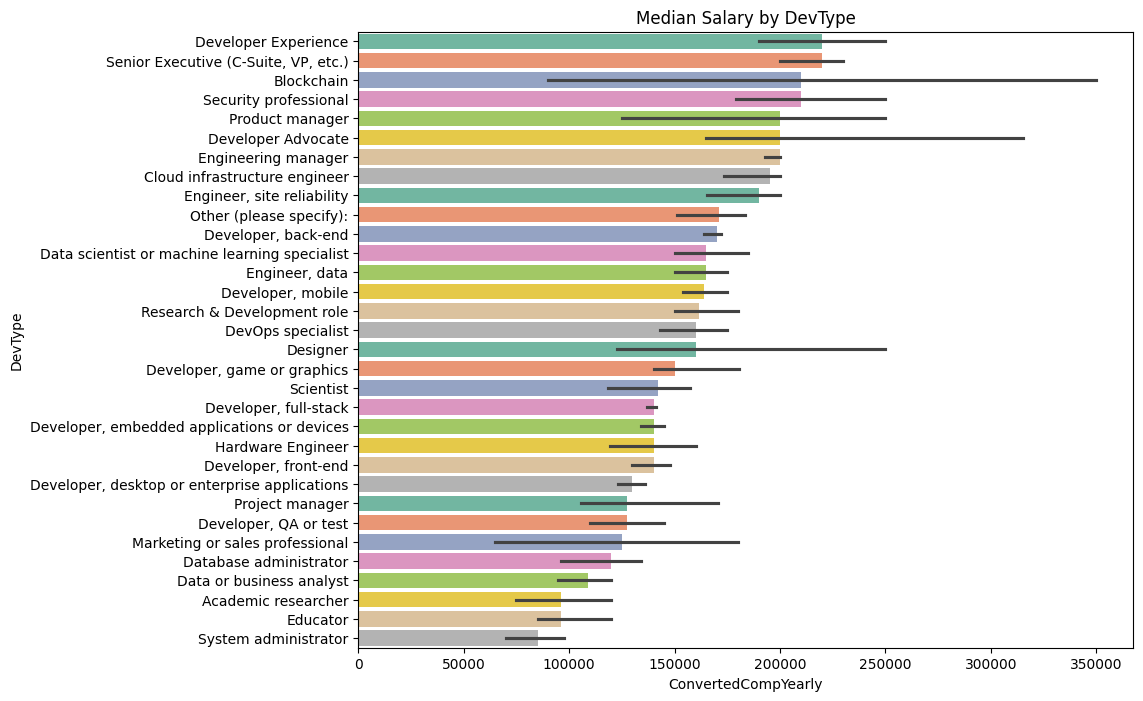

In [14]:
median_salary_by_devtype = df_usa.groupby('DevType')['ConvertedCompYearly'].median().sort_values(ascending=False).index

plt.figure(figsize=(10, 8))
sns.barplot(y='DevType', x='ConvertedCompYearly', estimator='median', data=df_usa, order=median_salary_by_devtype,palette='Set2')
plt.ylabel('DevType')
plt.xlabel('ConvertedCompYearly')
plt.title('Median Salary by DevType')
plt.show()

#### Industry

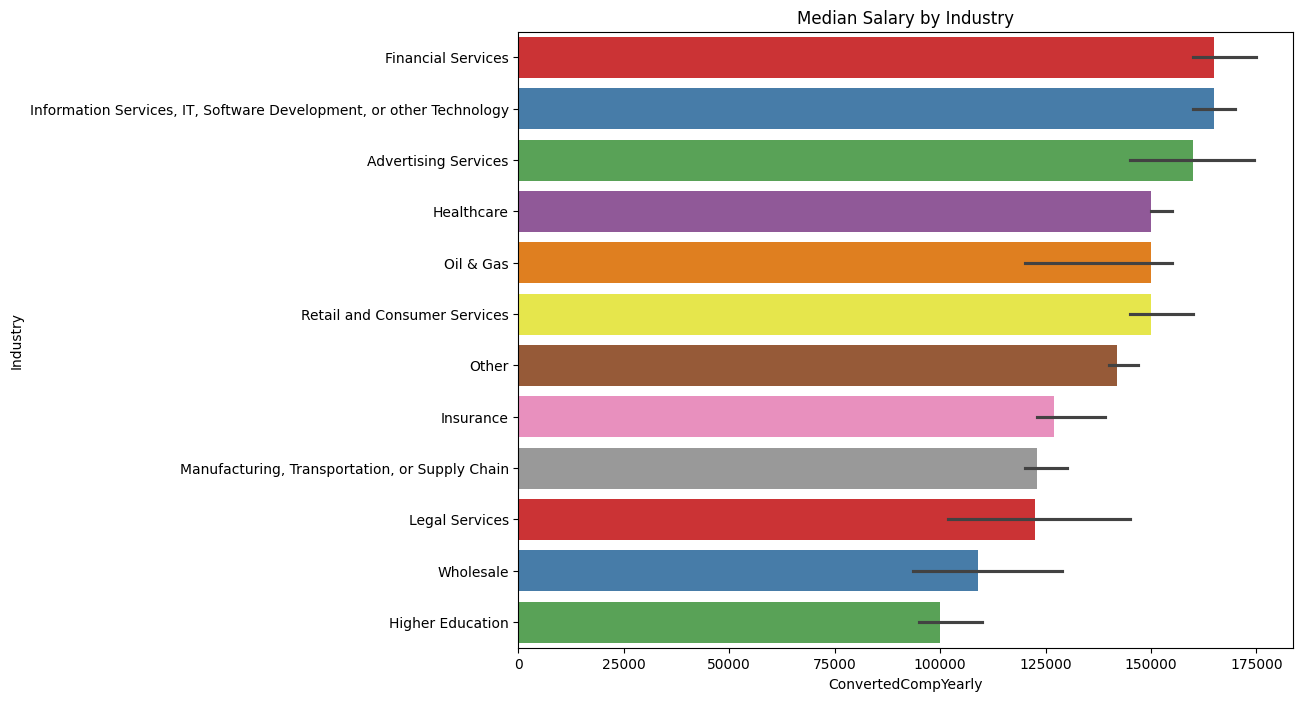

In [15]:
median_salary_by_industry = df_usa.groupby('Industry')['ConvertedCompYearly'].median().sort_values(ascending=False).index

plt.figure(figsize=(10, 8))
sns.barplot(y='Industry', x='ConvertedCompYearly', estimator='median', data=df_usa, order=median_salary_by_industry,palette='Set1')
plt.ylabel('Industry')
plt.xlabel('ConvertedCompYearly')
plt.title('Median Salary by Industry')
plt.show()

#### WorkExp

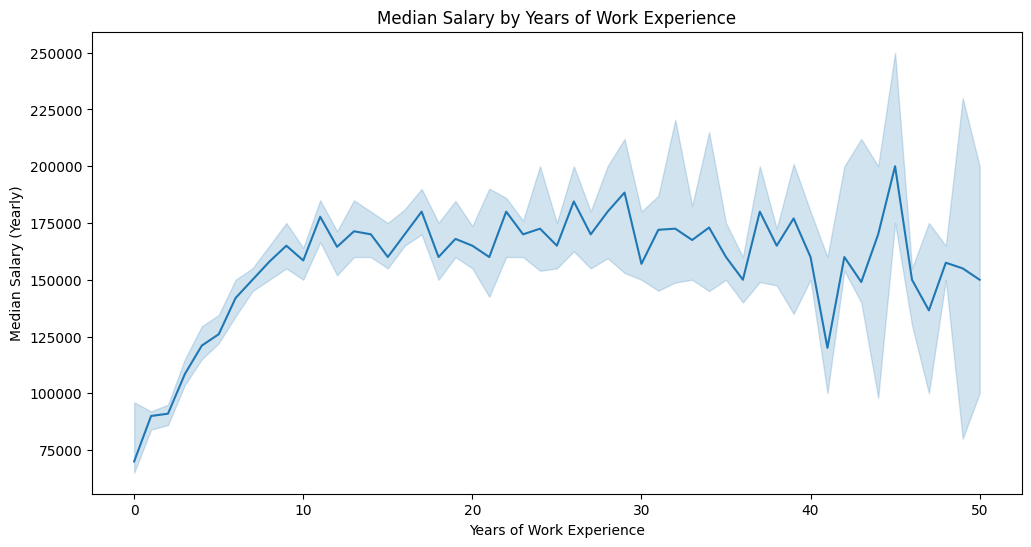

In [16]:
df_usa['WorkExp'] = pd.to_numeric(df_usa['WorkExp'], errors='coerce')

plt.figure(figsize=(12, 6))
sns.lineplot(x='WorkExp', y='ConvertedCompYearly', estimator='median', data=df_usa, errorbar='ci')
plt.xlabel('Years of Work Experience')
plt.ylabel('Median Salary (Yearly)')
plt.title('Median Salary by Years of Work Experience')
plt.show()

#### Years of Professional Coding Experience

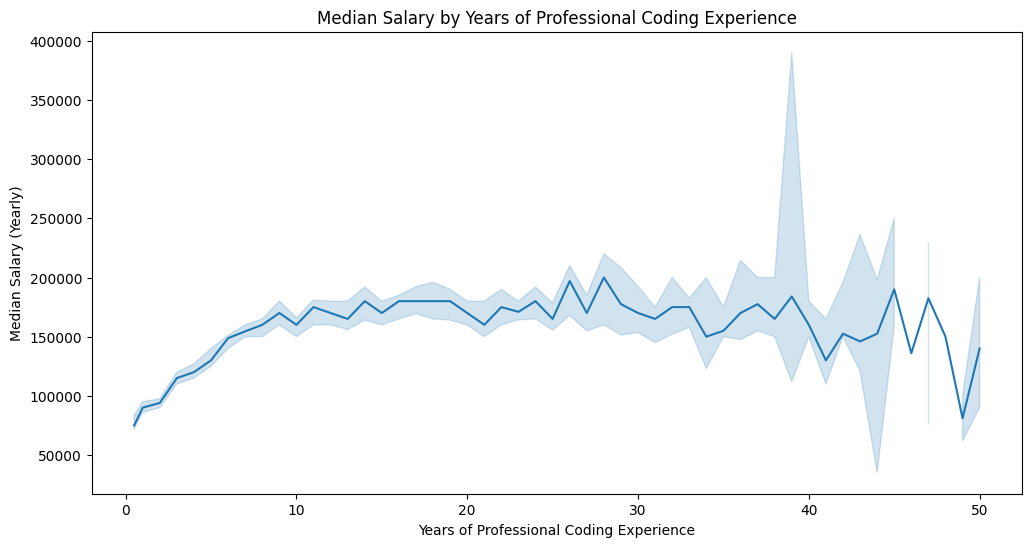

In [17]:
df_usa['YearsCodePro'] = pd.to_numeric(df_usa['YearsCodePro'], errors='coerce')

plt.figure(figsize=(12, 6))
sns.lineplot(x='YearsCodePro', y='ConvertedCompYearly', estimator='median', data=df_usa, errorbar='ci')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Median Salary (Yearly)')
plt.title('Median Salary by Years of Professional Coding Experience')
plt.show()

In [18]:
df_usa[['WorkExp','YearsCodePro']].corr()

,WorkExp,YearsCodePro
WorkExp,1.000000,0.922842
YearsCodePro,0.922842,1.000000


* We can get rid of either WorkExp (or) YearsCodePro, since they almost reflect the same and are highly correlated.

#### Organizational size

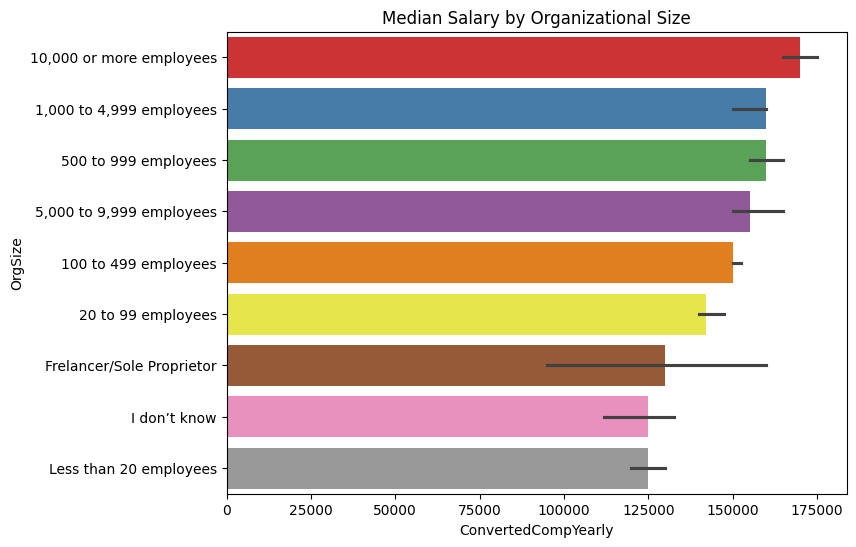

In [19]:
median_salary_by_orgsize = df_usa.groupby('OrgSize')['ConvertedCompYearly'].median().sort_values(ascending=False).index

plt.figure(figsize=(8, 6))
sns.barplot(y='OrgSize', x='ConvertedCompYearly', estimator='median', data=df_usa, order=median_salary_by_orgsize,palette='Set1')
plt.ylabel('OrgSize')
plt.xlabel('ConvertedCompYearly')
plt.title('Median Salary by Organizational Size')
plt.show()

#### Position level

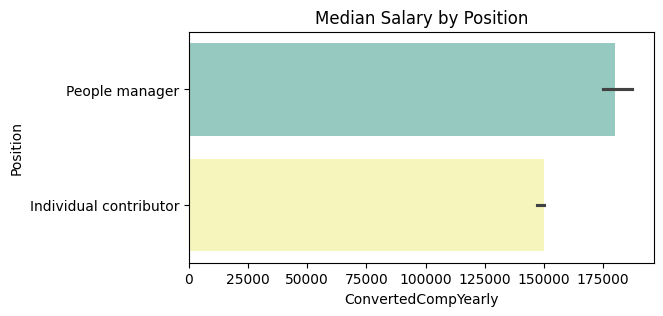

In [20]:
plt.figure(figsize=(6, 3))
sns.barplot(y='ICorPM', x='ConvertedCompYearly',estimator='median', data=df_usa,palette='Set3')
plt.ylabel('Position')
plt.xlabel('ConvertedCompYearly')
plt.title('Median Salary by Position')
plt.show()